In [1]:
import pandas as pd

In [2]:
import sklearn.metrics
def evaluation_metrices(y_true,y_pred):
    accuracy =sklearn.metrics.accuracy_score(y_true, y_pred)
    precision=sklearn.metrics.precision_score(y_true, y_pred)
    recall   =sklearn.metrics.recall_score(y_true, y_pred)
    f1_score =sklearn.metrics.f1_score(y_true, y_pred)
    print("Accuracy:",accuracy)
    print("Precision:",precision)
    print("Recall:",recall)
    print('F1 score:',f1_score)

In [3]:
import re

In [4]:
df=pd.read_csv('/Users/uditanshugupta/Downloads/train.csv')

In [5]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [6]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
## Get the Independent Features

X=df.drop('label', axis=1)

In [8]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [9]:
## Get the Dependent features
y=df['label']

In [10]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [11]:
df.shape

(20800, 5)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [13]:
df=df.dropna()

In [14]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [15]:
messages=df.copy()

In [16]:
messages.reset_index(inplace=True)

In [17]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [18]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [19]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [20]:
corpus[3]

'civilian kill singl us airstrik identifi'

In [21]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [22]:
X.shape

(18285, 5000)

In [23]:
y=messages['label']

In [24]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [25]:
X_train.shape

(12250, 5000)

In [26]:
X_test.shape

(6035, 5000)

In [27]:
y_train.shape

(12250,)

In [28]:
y_test.shape

(6035,)

In [29]:
tfidf_v.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [30]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [31]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [32]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
import matplotlib.pyplot as plt

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### MultinomialNB Algorithm

In [35]:

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [36]:
from sklearn import metrics
import numpy as np
import itertools

Accuracy: 0.8810273405136703
Precision: 0.914445399828031
Recall: 0.8038548752834467
F1 score: 0.8555913113435236
accuracy:   0.881
Confusion matrix, without normalization


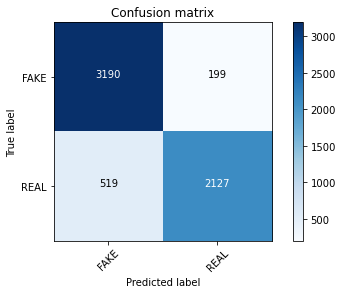

In [37]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
evaluation_metrices(y_test,pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [38]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8810273405136703

In [39]:
y_train.shape

(12250,)

### Passive Aggressive Classifier Algorithm

In [40]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

Accuracy: 0.9141673570836786
Precision: 0.9064171122994652
Recall: 0.8968253968253969
F1 score: 0.9015957446808511
accuracy:   0.914
Confusion matrix, without normalization


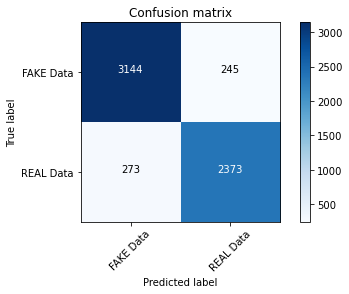

In [41]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
evaluation_metrices(y_test,pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [42]:
classifier.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9141673570836786

### Multinomial Classifier with Hyperparameter

In [43]:
classifier=MultinomialNB(alpha=0.3)

In [44]:
previous_score=0
for alpha in np.arange(0,1,0.3):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    evaluation_metrices(y_test,pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

Accuracy: 0.9141673570836786
Precision: 0.9064171122994652
Recall: 0.8968253968253969
F1 score: 0.9015957446808511
Alpha: 0.0, Score : 0.8662800331400166
Accuracy: 0.9141673570836786
Precision: 0.9064171122994652
Recall: 0.8968253968253969
F1 score: 0.9015957446808511
Alpha: 0.3, Score : 0.87986743993372
Accuracy: 0.9141673570836786
Precision: 0.9064171122994652
Recall: 0.8968253968253969
F1 score: 0.9015957446808511
Alpha: 0.6, Score : 0.8815244407622204
Accuracy: 0.9141673570836786
Precision: 0.9064171122994652
Recall: 0.8968253968253969
F1 score: 0.9015957446808511
Alpha: 0.8999999999999999, Score : 0.8816901408450705


/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


In [45]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8816901408450705

In [46]:
## Get Features names
feature_names = tfidf_v.get_feature_names()

In [47]:
classifier.coef_[0]

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([-8.79747339, -8.50390794, -8.86748348, ..., -9.89972258,
       -8.39148017, -9.09223723])

In [48]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.954033555069851, 'hillari'),
 (-4.985143813810477, 'trump'),
 (-5.09396777078389, 'clinton'),
 (-5.406224434792624, 'elect'),
 (-5.720704731812889, 'video'),
 (-5.7735494747560745, 'comment'),
 (-5.796370993571742, 'war'),
 (-5.813919655860566, 'us'),
 (-5.886315118097155, 'fbi'),
 (-5.887681855526013, 'hillari clinton'),
 (-5.937650910283555, 'vote'),
 (-5.955192196052632, 'world'),
 (-6.040948488999476, 'email'),
 (-6.133757591036377, 'obama'),
 (-6.144495883768216, 'america'),
 (-6.164714961804142, 'russia'),
 (-6.228464630593834, 'day'),
 (-6.234273085996778, 'american'),
 (-6.288053898708686, 'break'),
 (-6.3129601417365455, 'presid')]

In [49]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-9.899722583188804, 'abe'),
 (-9.899722583188804, 'abroad'),
 (-9.899722583188804, 'abus new'),
 (-9.899722583188804, 'abus new york'),
 (-9.899722583188804, 'act new'),
 (-9.899722583188804, 'act new york'),
 (-9.899722583188804, 'advic'),
 (-9.899722583188804, 'advis new'),
 (-9.899722583188804, 'advis new york'),
 (-9.899722583188804, 'age new'),
 (-9.899722583188804, 'age new york'),
 (-9.899722583188804, 'agenda breitbart'),
 (-9.899722583188804, 'ail'),
 (-9.899722583188804, 'aleppo new'),
 (-9.899722583188804, 'aleppo new york'),
 (-9.899722583188804, 'ali'),
 (-9.899722583188804, 'america breitbart'),
 (-9.899722583188804, 'america new york'),
 (-9.899722583188804, 'american breitbart'),
 (-9.899722583188804, 'american new'),
 (-9.899722583188804, 'american new york'),
 (-9.899722583188804, 'ami'),
 (-9.899722583188804, 'ami schumer'),
 (-9.899722583188804, 'amp'),
 (-9.899722583188804, 'ann'),
 (-9.899722583188804, 'ann coulter'),
 (-9.899722583188804, 'applaud'),
 (-9.89972

### GaussianNB Algorithm

In [50]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()

In [51]:
from sklearn import metrics
import numpy as np
import itertools

Accuracy: 0.7386909693454847
Precision: 0.642495334577446
Recall: 0.9108087679516251
F1 score: 0.7534781929029232
accuracy:   0.739
Confusion matrix, without normalization


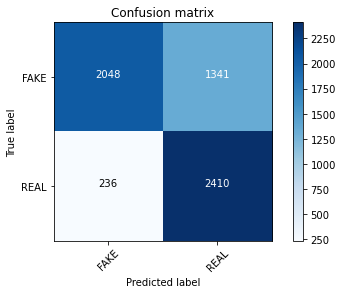

In [52]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
evaluation_metrices(y_test,pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [53]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.7386909693454847

### Logistic Regression 

In [54]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [55]:
from sklearn import metrics
import numpy as np
import itertools

Accuracy: 0.9224523612261806
Precision: 0.8647019423978567
Recall: 0.9758125472411187
F1 score: 0.9169034090909091
accuracy:   0.922
Confusion matrix, without normalization


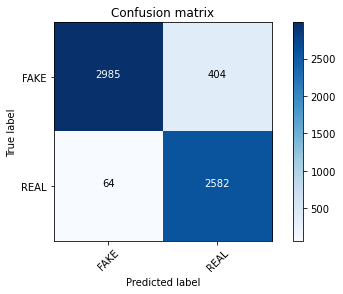

In [56]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
evaluation_metrices(y_test,pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [57]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9224523612261806

### Decision Tree Algorithm

In [58]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [59]:
from sklearn import metrics
import numpy as np
import itertools

Accuracy: 0.9116818558409279
Precision: 0.8911514253980007
Recall: 0.9096749811035525
F1 score: 0.9003179352908174
accuracy:   0.912
Confusion matrix, without normalization


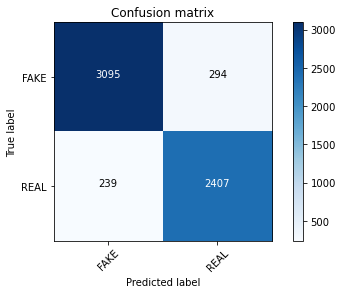

In [60]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
evaluation_metrices(y_test,pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [61]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.911847555923778

### SVM Classifier

In [62]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)

In [63]:
from sklearn import metrics
import numpy as np
import itertools

Accuracy: 0.9287489643744822
Precision: 0.8705685618729097
Recall: 0.9837490551776266
F1 score: 0.9237047551454932
accuracy:   0.929
Confusion matrix, without normalization


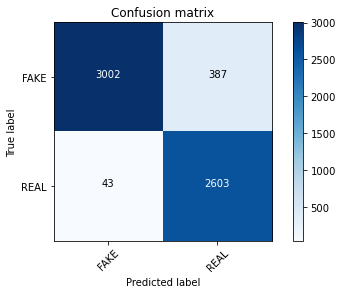

In [64]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
evaluation_metrices(y_test,pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [65]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9287489643744822

### K-Nearest Neighbour Classifier Algorithim

In [72]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()

In [73]:
from sklearn import metrics
import numpy as np
import itertools

Accuracy: 0.5214581607290804
Precision: 0.47795189504373176
Recall: 0.9913076341647771
F1 score: 0.6449471354806983
accuracy:   0.521
Confusion matrix, without normalization


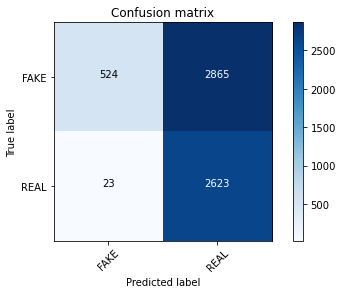

In [74]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
evaluation_metrices(y_test,pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [69]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.5214581607290804

### Random Forest Algorithim

In [75]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

Accuracy: 0.9325600662800332
Precision: 0.889120611748349
Recall: 0.9667422524565382
F1 score: 0.926308165851892
accuracy:   0.933
Confusion matrix, without normalization


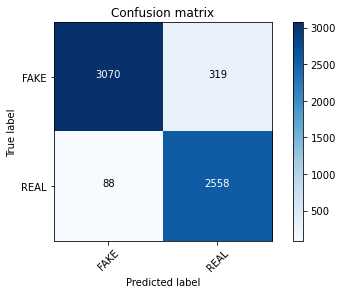

In [76]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
evaluation_metrices(y_test,pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])